<IPython.core.display.Javascript object>


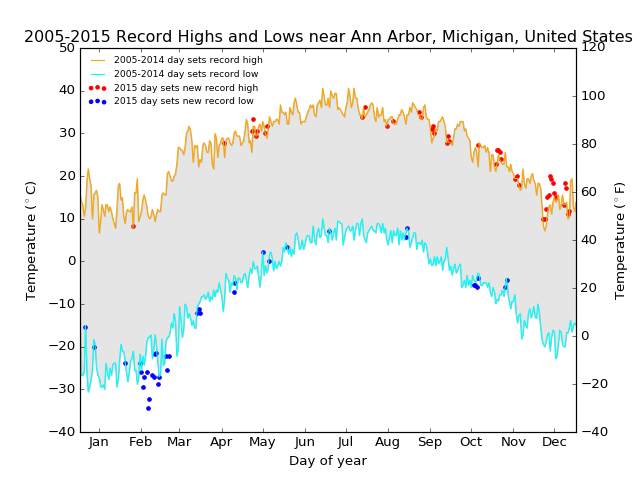

In [6]:
#This is the implement code of Assignment2 of date science course 2
#The latest update time is: 2017/3/9
#Auther: Mo Shuang
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.ticker as ticker

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'.format(400))

df['Data_Value'] = df['Data_Value'] * 0.1
    

df_max = df[df['Element']=='TMAX' ] 
df_max = df_max[df_max['Date']!='2008-02-29']
df_max = df_max[df_max['Date']!='2012-02-29']
df_min = df[df['Element']=='TMIN']
df_min = df_min[df_min['Date']!='2008-02-29']
df_min = df_min[df_min['Date']!='2012-02-29']

df_max = df_max.sort_values(by='Date', ascending=True)
df_min = df_min.sort_values(by='Date', ascending=True)

df_max['Year'] = df_max['Date'].map(lambda t: pd.to_datetime(t).year)
df_min['Year'] = df_min['Date'].map(lambda t: pd.to_datetime(t).year)

df_max_2015 = df_max[df_max['Year'] == 2015]
df_min_2015 = df_min[df_min['Year'] == 2015]
df_max_other = df_max[df_max['Year'] != 2015]
df_min_other = df_min[df_min['Year'] != 2015]

pd.options.mode.chained_assignment = None

df_max_other.loc[:, 'Date'] = df_max_other.loc[:, 'Date'].map(lambda t: pd.to_datetime(t))
df_min_other.loc[:, 'Date'] = df_min_other.loc[:, 'Date'].map(lambda t: pd.to_datetime(t))
df_max_2015.loc[:, 'Date'] = df_max_2015.loc[:, 'Date'].map(lambda t: pd.to_datetime(t))
df_min_2015.loc[:, 'Date'] = df_min_2015.loc[:, 'Date'].map(lambda t: pd.to_datetime(t))

df_max_other[ 'M_D'] = df_max_other.loc[:, 'Date'].map(lambda x: x.strftime('%m-%d'))
df_min_other[ 'M_D'] = df_min_other.loc[:, 'Date'].map(lambda x: x.strftime('%m-%d'))
df_max_2015[ 'M_D'] = df_max_2015.loc[:, 'Date'].map(lambda x: x.strftime('%m-%d'))
df_min_2015[ 'M_D'] = df_min_2015.loc[:, 'Date'].map(lambda x: x.strftime('%m-%d'))

df_max_2015 = df_max_2015.groupby(by=['M_D']).max()
df_min_2015 = df_min_2015.groupby(by=['M_D']).min()
df_max_other = df_max_other.groupby(by=['M_D']).max()
df_min_other = df_min_other.groupby(by=['M_D']).min()

y_max_2015 = df_max_2015['Data_Value'].values
y_min_2015 = df_min_2015['Data_Value'].values
y_max_other = df_max_other['Data_Value'].values
y_min_other = df_min_other['Data_Value'].values
y_max_2015 = y_max_2015.astype(float)
y_min_2015 = y_min_2015.astype(float)
i = 0
while i < len(y_max_2015):
    if y_max_2015[i] < y_max_other[i]:
        y_max_2015[i] = np.nan
    if y_min_2015[i] > y_min_other[i]:
        y_min_2015[i] = np.nan
    i += 1


date = np.arange("2015-01-01", "2016-01-01", dtype='datetime64[D]')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot( date, y_max_other, 'orange', date, y_min_other, 'cyan' )
ax1.scatter( date, y_max_2015, s=10, color='r' )
ax1.scatter( date, y_min_2015, s=10, color='b' )

plt.gca().fill_between(date, 
                       y_max_other, y_min_other, 
                       facecolor='grey', 
                       alpha=0.2, interpolate=True)

ax2 = ax1.twinx()
ax2.plot( date, y_max_other*1.8+32, 'orange', date, y_min_other*1.8+32, 'grey' )

ax1.set_xlabel('Day of year')
ax1.set_ylabel('Temperature ($^\circ$C)')

ax2.cla()
ax2.set_ylabel('Temperature ($^\circ$F)')
plt.title('2005-2015 Record Highs and Lows near Ann Arbor, Michigan, United States')
ax1.legend(['2005-2014 day sets record high', '2005-2014 day sets record low',
                 '2015 day sets new record high', '2015 day sets new record low'],     
           loc = 0, frameon = False,  fontsize='x-small' )

ax1.xaxis.set_major_locator( dates.MonthLocator() )
ax1.xaxis.set_major_locator( dates.MonthLocator( bymonthday=15 ) )
ax1.xaxis.set_major_formatter( ticker.NullFormatter() )
ax1.xaxis.set_major_formatter( dates.DateFormatter( '%b' ) )
plt.show()